# CS 109A/STAT 121A/AC 209A/CSCI E-109A  

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
PATH = 'data/'
!ls {'data/'}

goodreads.csv


In [96]:
columns=['rating', 'review_count', 'isbn', 'booktype', 'author_url','year','genre_urls','dir','rating_count','name']

In [97]:
df = pd.read_csv(f'{PATH}goodreads.csv')

In [98]:
df.columns = columns
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
1,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
2,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
3,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice
4,4.25,12363,0446675539,good_reads:book,https://www.goodreads.com/author/show/11081.Ma...,1936.0,/genres/classics|/genres/historical-fiction|/g...,dir01/18405.Gone_with_the_Wind.html,645470,Gone with the Wind


In [99]:
df['genres'] = df.genre_urls.replace(regex={'/genres/':''})

In [100]:
df['author'] = df.author_url.str.extract('((\w|_)*)$')[0]

In [101]:
df.drop(['booktype', 'author_url', 'genre_urls', 'dir', 'isbn'], axis=1, inplace=True)

In [102]:
df.head()

,rating,review_count,year,rating_count,name,genres,author
0,4.41,16648,2003.0,1284478,Harry Potter and the Order of the Phoenix (Har...,fantasy|young-adult|fiction|fantasy|magic|chil...,J_K_Rowling
1,3.56,85746,2005.0,2579564,"Twilight (Twilight, #1)",young-adult|fantasy|romance|paranormal|vampire...,Stephenie_Meyer
2,4.23,47906,1960.0,2078123,To Kill a Mockingbird,classics|fiction|historical-fiction|academic|s...,Harper_Lee
3,4.23,34772,1813.0,1388992,Pride and Prejudice,classics|fiction|romance|historical-fiction|li...,Jane_Austen
4,4.25,12363,1936.0,645470,Gone with the Wind,classics|historical-fiction|fiction|romance|li...,Margaret_Mitchell


##   Part 2: Asking Questions 
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

[5 min]

---

1.  Which authors get the best/worst ratings?
2.  Which are the best books of a particular genre?
3.  Which books are the most popular?
4.  Best book of each year?
5.  Most/Least popular genres?

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

In [129]:
science = df['genres'].where(df.genres.str.contains('science'))

In [220]:
df.year.sort_values().unique()

array([-1500.,  -800.,  -560.,  -512.,  -500.,  -458.,  -442.,  -440.,
        -431.,  -429.,  -411.,  -400.,  -390.,  -380.,  -370.,  -360.,
        -350.,   -29.,     4.,     8.,    13.,   100.,   121.,   130.,
         158.,   174.,   200.,   201.,   213.,   397.,   632.,   800.,
         900.,   968.,  1002.,  1008.,  1010.,  1100.,  1106.,  1140.,
        1200.,  1215.,  1220.,  1300.,  1314.,  1321.,  1348.,  1386.,
        1390.,  1391.,  1485.,  1516.,  1522.,  1532.,  1572.,  1589.,
        1590.,  1592.,  1595.,  1597.,  1599.,  1600.,  1601.,  1602.,
        1603.,  1604.,  1605.,  1606.,  1608.,  1609.,  1611.,  1621.,
        1623.,  1635.,  1642.,  1667.,  1678.,  1680.,  1691.,  1719.,
        1721.,  1726.,  1729.,  1748.,  1749.,  1759.,  1767.,  1774.,
        1776.,  1778.,  1781.,  1782.,  1787.,  1790.,  1791.,  1794.,
        1795.,  1798.,  1806.,  1811.,  1812.,  1813.,  1814.,  1815.,
        1817.,  1818.,  1819.,  1820.,  1823.,  1824.,  1825.,  1826.,
      

In [229]:
cols = ['year', 'genres']
genre_ana = df[cols]

In [234]:
genre_ana.year.where(genre_ana.year > 2010)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25      2012.0
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
5969       NaN
5970       NaN
5971    2011.0
5972    2011.0
5973    2013.0
5974    2013.0
5975    2014.0
5976       NaN
5977       NaN
5978       NaN
5979       NaN
5980       NaN
5981       NaN
5982       NaN
5983       NaN
5984       NaN
5985       NaN
5986       NaN
5987       NaN
5988    2011.0
5989       NaN
5990       NaN
5991       NaN
5992    2011.0
5993       NaN
5994       NaN
5995       NaN
5996    2012.0
5997       NaN
5998       NaN
Name: year, Length: 5999, dtype: float64

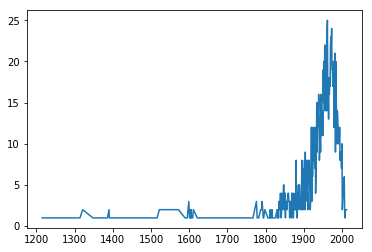

In [260]:
sci = genre_ana.where(genre_ana.genres.str.contains('classic') & (genre_ana.year > 1200))
sci = sci.year.value_counts()
sci = sci.sort_index()
sci.plot()

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

In [277]:
df.groupby(['rating', 'author']).head()

,rating,review_count,year,rating_count,name,genres,author
0,4.41,16648,2003.0,1284478,Harry Potter and the Order of the Phoenix (Har...,fantasy|young-adult|fiction|fantasy|magic|chil...,J_K_Rowling
1,3.56,85746,2005.0,2579564,"Twilight (Twilight, #1)",young-adult|fantasy|romance|paranormal|vampire...,Stephenie_Meyer
2,4.23,47906,1960.0,2078123,To Kill a Mockingbird,classics|fiction|historical-fiction|academic|s...,Harper_Lee
3,4.23,34772,1813.0,1388992,Pride and Prejudice,classics|fiction|romance|historical-fiction|li...,Jane_Austen
4,4.25,12363,1936.0,645470,Gone with the Wind,classics|historical-fiction|fiction|romance|li...,Margaret_Mitchell
5,4.22,7205,1949.0,286677,The Chronicles of Narnia (Chronicles of Narnia...,classics|young-adult|childrens|christian|adven...,C_S_Lewis
6,4.38,10902,1964.0,502891,The Giving Tree,childrens|young-adult|childrens|picture-books|...,Shel_Silverstein
7,3.79,20670,1945.0,1364879,Animal Farm,classics|fiction|science-fiction|dystopia|lite...,George_Orwell
8,4.18,12302,1979.0,724713,The Hitchhiker's Guide to the Galaxy (Hitchhik...,science-fiction|humor|fantasy|classics|humor|c...,Douglas_Adams
9,4.03,20937,1997.0,1042679,Memoirs of a Geisha,fiction|historical-fiction|romance|cultural|ja...,Arthur_Golden



## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

### Part 6.1: What can you conclude from the above visualizations?
Pick two or three genres and describe how the popularity of these genres fluctuates with time.  